<h1 align="center" style="
    margin-bottom:0;
    color:#0B3C5D;
    font-weight:700;
">
Rock–Paper–Scissors Image Classification<br><br>
<span style="font-size:20px; font-weight:500;">
Manual Deep Learning Architectures (MLP & CNN)
</span>
</h1>

<hr style="
    height:2px;
    border:none;
    background:#0B3C5D;
    width:60%;
">

<br>

<h3 style="color:#0B3C5D;">
Project Abstract
</h3>

<p style="font-size:15px; line-height:1.7;">
The objective of this project is to build a 
<b style="color:#0B3C5D;">high-performance image classification model</b> 
for a custom <b>Rock–Paper–Scissors</b> dataset using 
<b>manually designed neural network architectures</b>.
</p>

<p style="font-size:15px; line-height:1.7;">
Due to the relatively small dataset size, 
<b style="color:#8B0000;">overfitting</b> becomes a critical challenge. 
To mitigate this issue, models were carefully constructed from scratch 
and improved using structured regularization and generalization strategies.
</p>

<br>

<h3 style="color:#0B3C5D;">
Methods
</h3>

<ul style="font-size:15px; line-height:1.8;">
  <li>Feedforward Neural Networks (MLP)</li>
  <li>Convolutional Neural Networks (CNN)</li>
  <li>Data Augmentation</li>
  <li>Regularization — Dropout & L2 Weight Decay</li>
</ul>

<br>

<div style="
    padding:14px;
    border-left:4px solid #8B0000;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">
<b style="color:#0B3C5D;">Evaluation Focus:</b><br>
Performance is measured using the 
<b style="color:#0B3C5D;">Macro F1 Score</b>, 
ensuring balanced evaluation across all classes.
</div>



<p align="center">
  <img src="https://i.imgur.com/FEplJOR.jpeg" width="900">
</p>


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Problem Statement
</h3>

<p style="font-size:15px; line-height:1.7;">
Image classification is a core computer vision task. 
However, training deep neural networks <i>from scratch</i> typically requires 
large and diverse datasets to ensure proper generalization.
</p>

<p style="font-size:15px; line-height:1.7;">
Our dataset is relatively small (<b>~800 training images</b>), 
which introduces several practical challenges:
</p>

<ul style="font-size:15px; line-height:1.8;">
  <li><b style="color:#8B0000;">High risk of overfitting</b></li>
  <li>Limited representation of visual variations</li>
  <li>Sensitivity to hyperparameter tuning</li>
</ul>

<br>

<div style="
    padding:14px;
    border-left:4px solid #8B0000;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">
<b style="color:#0B3C5D;">Design Constraints</b>
<ul style="margin-top:8px; line-height:1.8;">
  <li>Fixed image resolution: <b>224 × 224</b></li>
  <li>Batch size: <b>16 or 32</b></li>
  <li>Manually designed architectures only</li>
  <li><b style="color:#8B0000;">No pretrained networks</b> (transfer learning not allowed)</li>
</ul>
</div>

<br>

<p style="font-size:15px; line-height:1.7;">
<b style="color:#0B3C5D;">Goal:</b> Develop stable and well-regularized architectures 
that achieve strong generalization performance despite limited data and strict 
architectural constraints.
</p>


In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pandas as pd

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow:", tf.__version__)
print("Keras:", keras.__version__)

TensorFlow: 2.20.0
Keras: 3.13.0


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Data Preprocessing
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<p>
All input images are resized to a fixed resolution of 
<b>224 × 224 pixels</b> to ensure consistent tensor dimensions 
throughout the training pipeline.
</p>

<p>
Pixel values are normalized to the range 
<b>[0, 1]</b> by dividing each value by 255.
</p>

<br>

<h4 style="color:#0B3C5D;">
Why Normalization?
</h4>

<ul style="line-height:1.8;">
  <li>Faster convergence during training</li>
  <li>More stable gradient updates</li>
  <li>Reduced risk of <b style="color:#8B0000;">numerical instability</b></li>
  <li>Improved conditioning for weight optimization</li>
</ul>

<br>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
">
<b style="color:#0B3C5D;">Technical Note:</b> 
Without normalization, large pixel magnitudes can produce unstable gradients 
and slower learning dynamics, particularly in deeper neural networks.
</div>

<br>

<p>
The preprocessing pipeline is integrated directly into the model workflow, 
ensuring the system remains fully self-contained and deployable without 
external feature-scaling dependencies.
</p>

</div>


In [19]:
DATA_ROOT = "data/rps"     
IMG_H, IMG_W = 224, 224    
BATCH_SIZE = 16            
EPOCHS = 50                
CLASSES = ["paper", "rock", "scissor"]
NUM_CLASSES = len(CLASSES)

print("DATA_ROOT:", DATA_ROOT)
print("IMG:", IMG_H, IMG_W)
print("BATCH:", BATCH_SIZE)
print("CLASSES:", CLASSES)

DATA_ROOT: data/rps
IMG: 224 224
BATCH: 16
CLASSES: ['paper', 'rock', 'scissor']


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Dataset Description
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<p>
The dataset consists of labeled images across three gesture classes 
used for supervised classification:
</p>

<ul style="line-height:1.8;">
  <li><b>Paper</b></li>
  <li><b>Rock</b></li>
  <li><b>Scissor</b></li>
</ul>

<br>

<h4 style="color:#0B3C5D;">
Dataset Split
</h4>

<ul style="line-height:1.8;">
  <li><b>Training:</b> 70%</li>
  <li><b>Validation:</b> 15%</li>
  <li><b>Test:</b> 15%</li>
</ul>

<br>

<h4 style="color:#0B3C5D;">
Rationale for the Split
</h4>

<ul style="line-height:1.8;">
  <li>The validation set is used for hyperparameter tuning and early overfitting detection.</li>
  <li>The test set is reserved strictly for final performance evaluation.</li>
  <li>This separation prevents data leakage between tuning and final scoring.</li>
</ul>

<br>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
">
<b style="color:#0B3C5D;">Class Balance:</b> 
The dataset is relatively balanced, reducing bias toward any single class 
and making the <b>Macro F1 score</b> a reliable evaluation metric.
</div>

</div>


In [3]:
# ============================================================
# 1) DATA LOADING (NumPy)
# ============================================================
def load_images_as_numpy(directory, img_size=(224, 224), verbose=True):
    """
    directory/
      class1/
      class2/
    Returns: X (N,H,W,3), y (N,), class_names(list)
    """
    images = []
    labels = []

    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory not found: {directory}")

    class_names = sorted([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])
    class_to_idx = {name: idx for idx, name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        if verbose:
            print(f"Loading {class_name}...", end=" ")
        count = 0

        for img_name in os.listdir(class_dir):
            if img_name.lower().endswith((".png", ".jpg", ".jpeg")):
                img_path = os.path.join(class_dir, img_name)
                try:
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
                    img_arr = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                    images.append(img_arr)
                    labels.append(class_to_idx[class_name])
                    count += 1
                except Exception as e:
                    if verbose:
                        print(f"\nError loading {img_path}: {e}")

        if verbose:
            print(f"{count} images")

    X = np.array(images)
    y = np.array(labels)
    return X, y, class_names


# Load splits
print("\nLoading training data...")
X_train, y_train, class_names = load_images_as_numpy(os.path.join(DATA_ROOT, "train"), (IMG_H, IMG_W), verbose=True)

print("\nLoading validation data...")
X_val, y_val, _ = load_images_as_numpy(os.path.join(DATA_ROOT, "val"), (IMG_H, IMG_W), verbose=False)

print("\nLoading test data...")
X_test, y_test, _ = load_images_as_numpy(os.path.join(DATA_ROOT, "test"), (IMG_H, IMG_W), verbose=False)

print("\n" + "="*60)
print("DATA LOADED SUCCESSFULLY")
print("="*60)
print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)
print("Classes:", class_names)

print("\nTrain class distribution:")
for i, cname in enumerate(class_names):
    c = np.sum(y_train == i)
    print(f"  {cname}: {c} ({c/len(y_train)*100:.1f}%)")



Loading training data...
266 imagesper... 
267 imagesck... 
265 imagesissor... 

Loading validation data...

Loading test data...

DATA LOADED SUCCESSFULLY
Train: (798, 224, 224, 3) Val: (199, 224, 224, 3) Test: (25, 224, 224, 3)
Classes: ['paper', 'rock', 'scissor']

Train class distribution:
  paper: 266 (33.3%)
  rock: 267 (33.5%)
  scissor: 265 (33.2%)


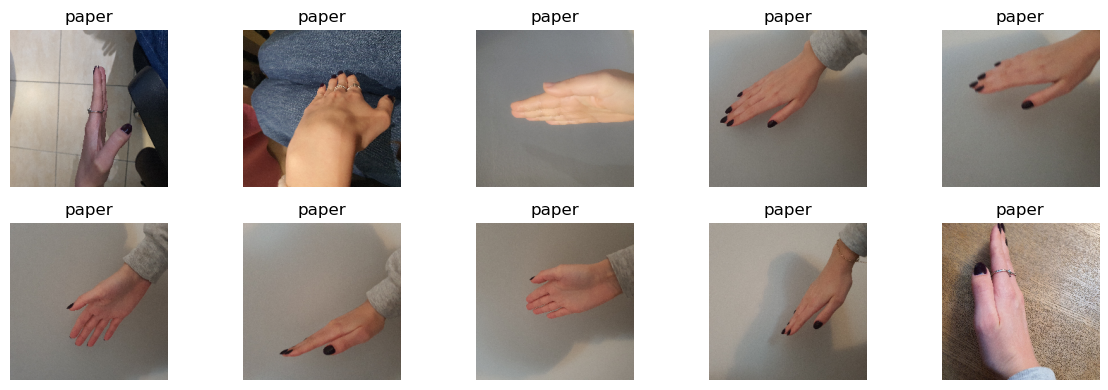

In [4]:
# Show sample images
plt.figure(figsize=(12, 4))
for i in range(min(10, len(X_train))):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [1]:
# ============================================================
# 2) UTILITIES:
# ============================================================
def flatten_images(X):
    return X.reshape(X.shape[0], -1)

def plot_history(history, title="Training History"):
    if history is None:
        return
    h = history.history
    epochs = range(1, len(h.get("loss", [])) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    if "accuracy" in h: plt.plot(epochs, h["accuracy"], label="train_acc")
    if "val_accuracy" in h: plt.plot(epochs, h["val_accuracy"], label="val_acc")
    plt.title("Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Acc"); plt.legend()

    plt.subplot(1, 2, 2)
    if "loss" in h: plt.plot(epochs, h["loss"], label="train_loss")
    if "val_loss" in h: plt.plot(epochs, h["val_loss"], label="val_loss")
    plt.title("Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def evaluate_probs(y_true, y_pred_probs, class_names, title="Evaluation"):
    y_pred = np.argmax(y_pred_probs, axis=1)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")

    print("\n" + "="*70)
    print(title.upper())
    print("="*70)
    print(f"Accuracy: {acc:.2%}")
    print(f"Macro F1: {f1:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    return acc, f1

results = []  

def log_result(name, model_type, val_acc, val_f1, notes=""):
    results.append({
        "Experiment": name,
        "Model": model_type,
        "Val Acc": round(val_acc*100, 2),
        "Val MacroF1": round(val_f1, 4),
        "Notes": notes
    })
    df = pd.DataFrame(results)
    display(df.sort_values(by="Val Acc", ascending=False))


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Baseline Classical Models
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<p>
Before training deep neural networks, we evaluated traditional 
machine learning models as baseline references:
</p>

<ul style="line-height:1.8;">
  <li><b>Decision Tree</b></li>
  <li><b>Logistic Regression</b></li>
</ul>

<br>

<p>
Both models required flattening each image into a high-dimensional vector 
containing <b>150,528 features (224 × 224 × 3)</b>.
</p>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
    margin-top:10px;
">
<b style="color:#0B3C5D;">Limitation:</b> 
Flattening removes spatial structure, causing the models to lose 
important local patterns and visual hierarchies inherent in images.
</div>

</div>


In [6]:
# ============================================================
# 3) BASELINES (Decision Tree, Logistic Regression)
# ============================================================
X_train_flat = flatten_images(X_train)
X_val_flat   = flatten_images(X_val)
X_test_flat  = flatten_images(X_test)

print("Flattened shapes:", X_train_flat.shape, X_val_flat.shape, X_test_flat.shape)

# Decision Tree (baseline)
dt = DecisionTreeClassifier(max_depth=15, random_state=42)
dt.fit(X_train_flat, y_train)
val_pred_dt = dt.predict(X_val_flat)
dt_val_acc = accuracy_score(y_val, val_pred_dt)
dt_val_f1 = f1_score(y_val, val_pred_dt, average="macro")
print(f"Decision Tree Val Acc: {dt_val_acc:.2%}  MacroF1: {dt_val_f1:.4f}")
log_result("DT_maxDepth15", "DecisionTree", dt_val_acc, dt_val_f1, "Flattened pixels")

# Logistic Regression baseline (scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_val_scaled   = scaler.transform(X_val_flat)

lr = LogisticRegression(max_iter=1000, random_state=42, C=0.1)
lr.fit(X_train_scaled, y_train)
val_pred_lr = lr.predict(X_val_scaled)
lr_val_acc = accuracy_score(y_val, val_pred_lr)
lr_val_f1 = f1_score(y_val, val_pred_lr, average="macro")
print(f"LogReg Val Acc: {lr_val_acc:.2%}  MacroF1: {lr_val_f1:.4f}")
log_result("LR_C0.1_scaled", "LogReg", lr_val_acc, lr_val_f1, "Uses StandardScaler (external)")


Flattened shapes: (798, 150528) (199, 150528) (25, 150528)
Decision Tree Val Acc: 48.24%  MacroF1: 0.4745


,Experiment,Model,Val Acc,Val MacroF1,Notes
0,DT_maxDepth15,DecisionTree,48.24,0.4745,Flattened pixels


LogReg Val Acc: 58.79%  MacroF1: 0.5871


,Experiment,Model,Val Acc,Val MacroF1,Notes
1,LR_C0.1_scaled,LogReg,58.79,0.5871,Uses StandardScaler (external)
0,DT_maxDepth15,DecisionTree,48.24,0.4745,Flattened pixels


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Observations
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<p>
The validation performance of the classical baseline models is summarized below:
</p>

<ul style="line-height:1.8;">
  <li>
    <b>Decision Tree:</b><br>
    Validation Accuracy — <b>48.24%</b><br>
    Macro F1 Score — <b>0.4745</b>
  </li>
  <br>
  <li>
    <b>Logistic Regression:</b><br>
    Validation Accuracy — <b>58.79%</b><br>
    Macro F1 Score — <b>0.5871</b>
  </li>
</ul>

<br>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
">
<b style="color:#0B3C5D;">Key Insight:</b> 
These models struggle because flattening destroys the spatial structure of the images. 
Classical algorithms cannot efficiently capture local patterns and hierarchical visual features.
</div>

</div>


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Multilayer Perceptron (MLP)
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<p>
A fully connected neural network was implemented as the first deep learning model.
The architecture operates on flattened image vectors and serves as a 
non-convolutional benchmark.
</p>

<br>

<h4 style="color:#0B3C5D;">
Architecture Components
</h4>

<ul style="line-height:1.8;">
  <li>Dense (Fully Connected) Layers</li>
  <li>Batch Normalization</li>
  <li>Dropout Regularization</li>
</ul>

<br>

<p>
Each input image is reshaped into a one-dimensional vector before being 
fed into the network.
</p>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
    margin-top:10px;
">
<b style="color:#0B3C5D;">Limitation:</b> 
Although the MLP can learn global feature interactions, it does not preserve 
spatial locality, which limits its ability to capture hierarchical visual patterns.
</div>

</div>


In [7]:
# ============================================================
# 4) FFNN / MLP
# ============================================================
def build_mlp_model(input_dim, num_classes):
    model = keras.Sequential([
        keras.layers.Input(shape=(input_dim,)),

        keras.layers.Dense(512),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Dropout(0.4),

        keras.layers.Dense(256),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Dropout(0.3),

        keras.layers.Dense(128),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(num_classes, activation="softmax"),
    ], name="MLP_Optimized")
    return model

In [8]:
def compile_with_callbacks(model, lr=1e-3):
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    callbacks = [
        keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True, verbose=1),
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6, verbose=1),
    ]
    return callbacks

mlp = build_mlp_model(X_train_flat.shape[1], NUM_CLASSES)
mlp.summary()

Model: "MLP_Optimized"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │      77,070,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,239,043 (294.64 MB)

 Trainable params: 77,237,251 (294.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 439ms/step - accuracy: 0.3734 - loss: 1.3127 - val_accuracy: 0.3166 - val_loss: 3.2853 - learning_rate: 0.0010
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 431ms/step - accuracy: 0.4687 - loss: 1.1309 - val_accuracy: 0.3467 - val_loss: 1.9741 - learning_rate: 0.0010
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 434ms/step - accuracy: 0.4724 - loss: 1.0462 - val_accuracy: 0.3568 - val_loss: 1.4891 - learning_rate: 0.0010
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 433ms/step - accuracy: 0.5539 - loss: 0.9791 - val_accuracy: 0.3467 - val_loss: 1.3426 - learning_rate: 0.0010
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 462ms/step - accuracy: 0.5702 - loss: 0.9365 - val_accuracy: 0.4372 - val_loss: 1.2473 - learning_rate: 0.0010
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 507ms/step - accuracy: 0.6303 - loss: 0.8760 - val_accuracy: 0.4020 - val_loss: 1.3972 - learning_rate: 0.0010
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 496ms/step - accuracy: 0.6642 - loss: 0.

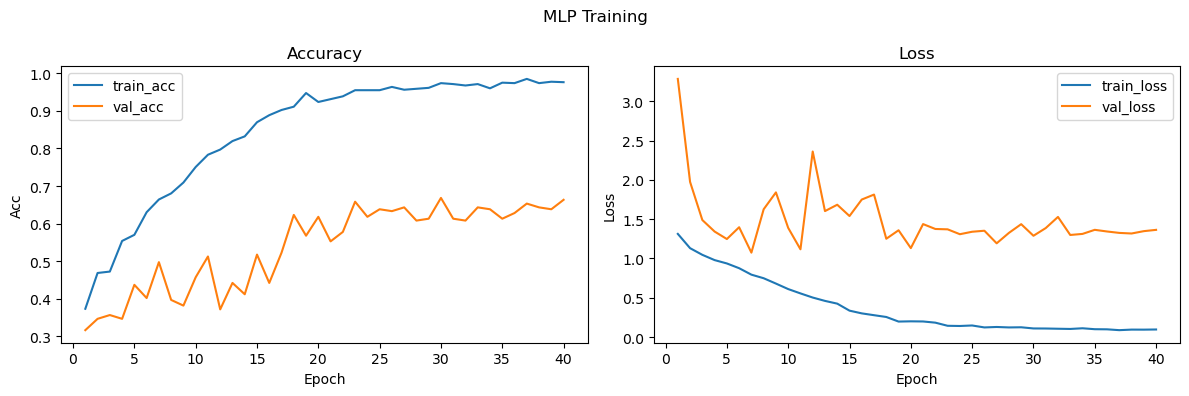


MLP VALIDATION
Accuracy: 66.83%
Macro F1: 0.6684

Classification Report:
              precision    recall  f1-score   support

       paper       0.67      0.69      0.68        67
        rock       0.62      0.72      0.66        67
     scissor       0.75      0.60      0.67        65

    accuracy                           0.67       199
   macro avg       0.68      0.67      0.67       199
weighted avg       0.68      0.67      0.67       199



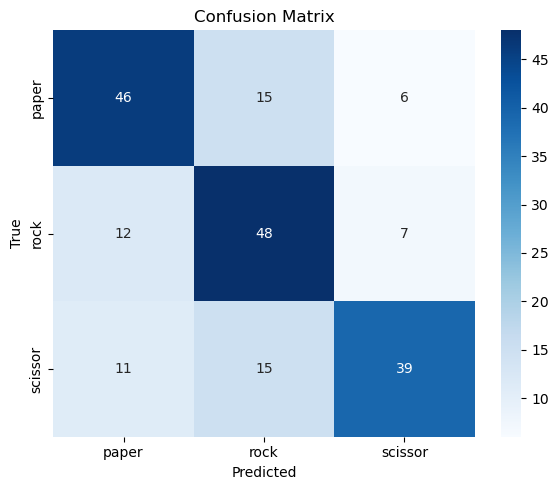

,Experiment,Model,Val Acc,Val MacroF1,Notes
2,MLP_baseline,MLP,66.83,0.6684,"Flatten pixels, BN+Dropout"
1,LR_C0.1_scaled,LogReg,58.79,0.5871,Uses StandardScaler (external)
0,DT_maxDepth15,DecisionTree,48.24,0.4745,Flattened pixels


In [9]:
callbacks = compile_with_callbacks(mlp, lr=1e-3)
history_mlp = mlp.fit(
    X_train_flat, y_train,
    validation_data=(X_val_flat, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

plot_history(history_mlp, "MLP Training")

val_probs_mlp = mlp.predict(X_val_flat, verbose=0)
mlp_val_acc, mlp_val_f1 = evaluate_probs(y_val, val_probs_mlp, class_names, "MLP Validation")
log_result("MLP_baseline", "MLP", mlp_val_acc, mlp_val_f1, "Flatten pixels, BN+Dropout")


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
MLP Performance
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<h4 style="color:#0B3C5D;">
Validation Results
</h4>

<ul style="line-height:1.8;">
  <li><b>Validation Accuracy:</b> 66.83%</li>
  <li><b>Macro F1 Score:</b> 0.6684</li>
</ul>

<br>

<h4 style="color:#0B3C5D;">
Analysis
</h4>

<p>
The MLP demonstrates a clear improvement over classical machine learning models, 
indicating that deeper nonlinear representations enhance classification performance.
</p>

<p>
However, performance remains limited due to the architectural constraint of 
flattening the input images. This transformation removes spatial and positional 
information, which is critical for visual pattern recognition.
</p>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
    margin-top:10px;
">
<b style="color:#0B3C5D;">Conclusion:</b> 
Although the MLP captures global feature interactions, it lacks the inductive bias 
required to model local spatial dependencies, making it suboptimal for image-based tasks.
</div>

</div>


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Convolutional Neural Network (CNN)
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<p>
Convolutional Neural Networks (CNNs) are specifically designed 
for image-based tasks and incorporate architectural inductive biases 
that preserve spatial structure.
</p>

<br>

<h4 style="color:#0B3C5D;">
Core Components
</h4>

<ul style="line-height:1.8;">
  <li><b>Convolutional Layers</b> — Learn spatial filters and local feature patterns</li>
  <li><b>MaxPooling Layers</b> — Perform spatial downsampling and reduce dimensionality</li>
  <li><b>Dense Classifier Head</b> — Maps extracted features to final class probabilities</li>
</ul>

<br>

<p>
Unlike MLP architectures, CNNs operate directly on the 
two-dimensional image structure. Convolutional filters slide across 
the input, enabling the model to learn hierarchical spatial features 
such as edges, textures, and complex shapes.
</p>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
    margin-top:10px;
">
<b style="color:#0B3C5D;">Architectural Advantage:</b> 
Parameter sharing and local receptive fields significantly reduce 
the number of learnable parameters while preserving spatial locality, 
making CNNs more suitable for image classification tasks.
</div>

</div>


In [10]:
# ============================================================
# 5) CNN (better than flatten for images)
# ============================================================
def build_cnn_model(num_classes=3, l2=0.0, dropout=0.3):
    reg = keras.regularizers.l2(l2) if l2 and l2 > 0 else None

    model = keras.Sequential([
        keras.layers.Input(shape=(IMG_H, IMG_W, 3)),

        keras.layers.Conv2D(32, 3, padding="same", activation="relu", kernel_regularizer=reg),
        keras.layers.MaxPooling2D(),

        keras.layers.Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer=reg),
        keras.layers.MaxPooling2D(),

        keras.layers.Conv2D(128, 3, padding="same", activation="relu", kernel_regularizer=reg),
        keras.layers.MaxPooling2D(),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(num_classes, activation="softmax")
    ], name="CNN_Basic")

    return model

Model: "CNN_Basic"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,938,819 (49.36 MB)

 Trainable params: 12,938,819 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 427ms/step - accuracy: 0.3759 - loss: 1.1908 - val_accuracy: 0.3367 - val_loss: 1.1660 - learning_rate: 0.0010
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 424ms/step - accuracy: 0.4850 - loss: 0.9949 - val_accuracy: 0.4271 - val_loss: 1.0371 - learning_rate: 0.0010
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 409ms/step - accuracy: 0.6441 - loss: 0.7557 - val_accuracy: 0.5729 - val_loss: 1.0633 - learning_rate: 0.0010
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 401ms/step - accuracy: 0.7594 - loss: 0.5966 - val_accuracy: 0.5578 - val_loss: 1.1281 - learning_rate: 0.0010
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 392ms/step - accuracy: 0.8070 - loss: 0.4624 - val_accuracy: 0.5327 - val_loss: 1.1540 - learning_rate: 0.0010
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 413ms/step - accuracy: 0.8847 - loss: 0.3048 - val_accuracy: 0.6583 - val_loss: 1.2350 - learning_rate: 0.0010
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9071 - loss: 0.2

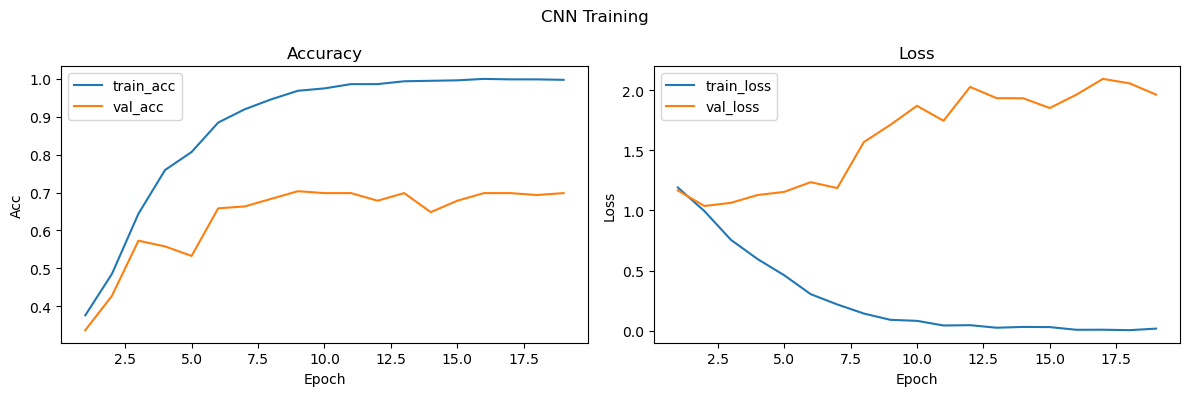


CNN VALIDATION
Accuracy: 70.35%
Macro F1: 0.7032

Classification Report:
              precision    recall  f1-score   support

       paper       0.68      0.76      0.72        67
        rock       0.70      0.66      0.68        67
     scissor       0.74      0.69      0.71        65

    accuracy                           0.70       199
   macro avg       0.71      0.70      0.70       199
weighted avg       0.71      0.70      0.70       199



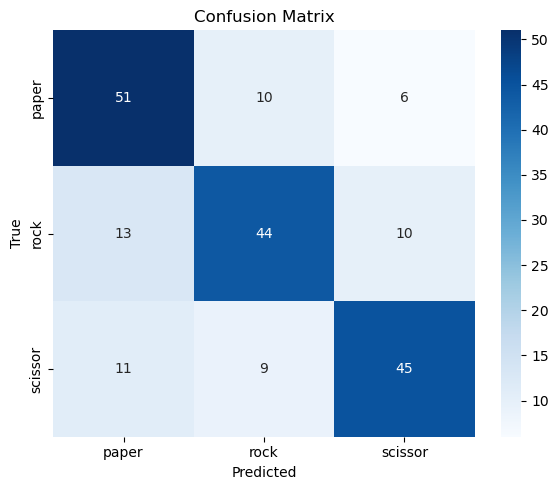

,Experiment,Model,Val Acc,Val MacroF1,Notes
3,CNN_basic,CNN,70.35,0.7032,"No augmentation, l2=0, dropout=0.3"
2,MLP_baseline,MLP,66.83,0.6684,"Flatten pixels, BN+Dropout"
1,LR_C0.1_scaled,LogReg,58.79,0.5871,Uses StandardScaler (external)
0,DT_maxDepth15,DecisionTree,48.24,0.4745,Flattened pixels


In [12]:
cnn = build_cnn_model(NUM_CLASSES, l2=0.0, dropout=0.3)
cnn.summary()

callbacks = compile_with_callbacks(cnn, lr=1e-3)
history_cnn = cnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

plot_history(history_cnn, "CNN Training")

val_probs_cnn = cnn.predict(X_val, verbose=0)
cnn_val_acc, cnn_val_f1 = evaluate_probs(y_val, val_probs_cnn, class_names, "CNN Validation")
log_result("CNN_basic", "CNN", cnn_val_acc, cnn_val_f1, "No augmentation, l2=0, dropout=0.3")


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Baseline CNN Performance
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<h4 style="color:#0B3C5D;">
Validation Results
</h4>

<ul style="line-height:1.8;">
  <li><b>Validation Accuracy:</b> 70.35%</li>
  <li><b>Macro F1 Score:</b> 0.7032</li>
</ul>

<br>

<p>
The CNN outperforms both classical models and the MLP architecture, 
demonstrating the importance of spatial feature extraction in image classification tasks.
</p>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
    margin-top:10px;
">
<b style="color:#0B3C5D;">Interpretation:</b> 
By preserving spatial locality and learning hierarchical visual representations, 
the CNN captures meaningful patterns that fully connected architectures cannot model efficiently.
</div>

</div>


---

<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Data Augmentation
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<p>
Given the limited size of the dataset, data augmentation techniques were applied 
to improve generalization and reduce overfitting.
</p>

<br>

<h4 style="color:#0B3C5D;">
Applied Transformations
</h4>

<ul style="line-height:1.8;">
  <li>Random horizontal flipping</li>
  <li>Small-angle rotation</li>
  <li>Minor zoom variations</li>
  <li>Contrast adjustment</li>
</ul>

<br>

<h4 style="color:#0B3C5D;">
Rationale
</h4>

<p>
Data augmentation artificially increases dataset variability by generating 
slightly modified versions of existing images during training.
</p>

<p>
This process encourages the model to learn robust feature representations 
rather than memorizing specific image patterns.
</p>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
    margin-top:10px;
">
<b style="color:#0B3C5D;">Impact on Generalization:</b> 
By exposing the network to controlled variations of the same image, 
augmentation reduces the risk of overfitting and improves performance 
on unseen data.
</div>

</div>


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Final Model: CNN + Augmentation + Regularization
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<p>
To further enhance generalization and stabilize training dynamics, 
additional regularization techniques were incorporated into the CNN architecture.
</p>

<br>

<h4 style="color:#0B3C5D;">
Optimization Strategy
</h4>

<ul style="line-height:1.8;">
  <li><b>Data Augmentation</b></li>
  <li><b>Dropout Rate:</b> 0.4</li>
  <li><b>L2 Regularization:</b> 1e-4</li>
  <li><b>Learning Rate:</b> 5 × 10<sup>-4</sup></li>
</ul>

<br>

<p>
Dropout introduces stochastic neuron deactivation during training, 
preventing co-adaptation of features and improving robustness.
</p>

<p>
L2 regularization penalizes excessively large weights, encouraging 
simpler and more stable representations.
</p>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
    margin-top:10px;
">
<b style="color:#0B3C5D;">Regularization Effect:</b> 
The combination of augmentation, dropout, and weight decay 
reduces overfitting while preserving discriminative capacity, 
leading to improved Macro F1 performance.
</div>

</div>


In [13]:
# ============================================================
# 6) DATA AUGMENTATION + CNN HEAD
# ============================================================
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.08),
    keras.layers.RandomZoom(0.10),
    keras.layers.RandomContrast(0.10),
], name="Augment")

def build_aug_cnn(num_classes=3, l2=0.0, dropout=0.3):
    reg = keras.regularizers.l2(l2) if l2 and l2 > 0 else None

    inputs = keras.Input(shape=(IMG_H, IMG_W, 3))
    x = data_augmentation(inputs)
    x = keras.layers.Conv2D(32, 3, padding="same", activation="relu", kernel_regularizer=reg)(x)
    x = keras.layers.MaxPooling2D()(x)

    x = keras.layers.Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer=reg)(x)
    x = keras.layers.MaxPooling2D()(x)

    x = keras.layers.Conv2D(128, 3, padding="same", activation="relu", kernel_regularizer=reg)(x)
    x = keras.layers.MaxPooling2D()(x)

    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation="relu")(x)
    x = keras.layers.Dropout(dropout)(x)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs, name="CNN_Augmented")

Model: "CNN_Augmented"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Augment (Sequential)                 │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,938,819 (49.36 MB)

 Trainable params: 12,938,819 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 475ms/step - accuracy: 0.3346 - loss: 1.1843 - val_accuracy: 0.3417 - val_loss: 1.1115 - learning_rate: 5.0000e-04
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 472ms/step - accuracy: 0.3571 - loss: 1.1093 - val_accuracy: 0.3367 - val_loss: 1.1426 - learning_rate: 5.0000e-04
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 477ms/step - accuracy: 0.3972 - loss: 1.1060 - val_accuracy: 0.4070 - val_loss: 1.1004 - learning_rate: 5.0000e-04
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 459ms/step - accuracy: 0.3985 - loss: 1.0960 - val_accuracy: 0.3317 - val_loss: 1.0856 - learning_rate: 5.0000e-04
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 455ms/step - accuracy: 0.4586 - loss: 1.0511 - val_accuracy: 0.4070 - val_loss: 1.0734 - learning_rate: 5.0000e-04
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 463ms/step - accuracy: 0.5050 - loss: 0.9862 - val_accuracy: 0.4322 - val_loss: 1.0630 - learning_rate: 5.0000e-04
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 462ms/step - acc

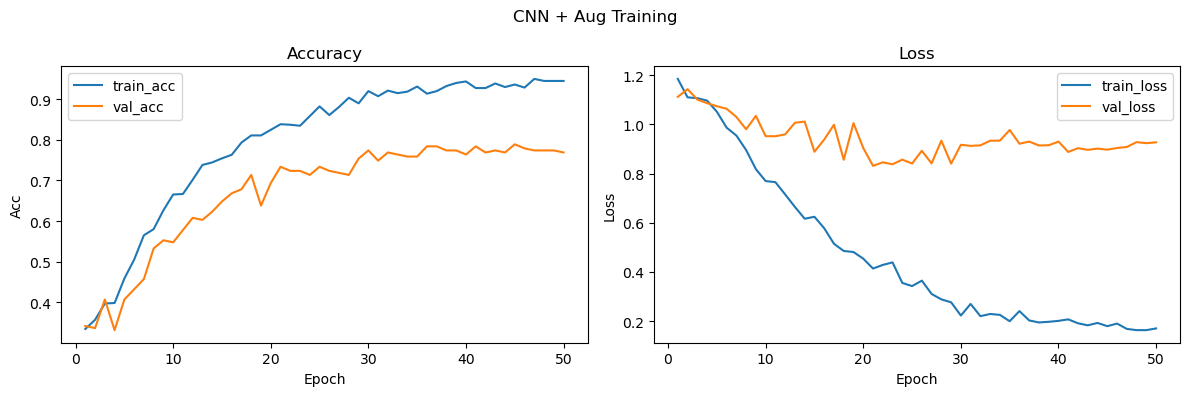


CNN+AUG VALIDATION
Accuracy: 78.89%
Macro F1: 0.7895

Classification Report:
              precision    recall  f1-score   support

       paper       0.73      0.76      0.74        67
        rock       0.85      0.82      0.83        67
     scissor       0.80      0.78      0.79        65

    accuracy                           0.79       199
   macro avg       0.79      0.79      0.79       199
weighted avg       0.79      0.79      0.79       199



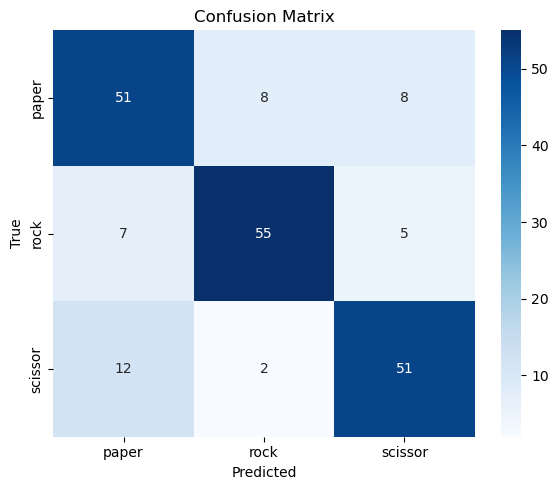

,Experiment,Model,Val Acc,Val MacroF1,Notes
4,CNN_aug_l2_dropout,CNN,78.89,0.7895,"Aug + l2=1e-4 + dropout=0.4, lr=5e-4"
3,CNN_basic,CNN,70.35,0.7032,"No augmentation, l2=0, dropout=0.3"
2,MLP_baseline,MLP,66.83,0.6684,"Flatten pixels, BN+Dropout"
1,LR_C0.1_scaled,LogReg,58.79,0.5871,Uses StandardScaler (external)
0,DT_maxDepth15,DecisionTree,48.24,0.4745,Flattened pixels


In [14]:
cnn_aug = build_aug_cnn(NUM_CLASSES, l2=1e-4, dropout=0.4)
cnn_aug.summary()

callbacks = compile_with_callbacks(cnn_aug, lr=5e-4)
history_cnn_aug = cnn_aug.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

plot_history(history_cnn_aug, "CNN + Aug Training")

val_probs_cnn_aug = cnn_aug.predict(X_val, verbose=0)
cnn_aug_val_acc, cnn_aug_val_f1 = evaluate_probs(y_val, val_probs_cnn_aug, class_names, "CNN+Aug Validation")
log_result("CNN_aug_l2_dropout", "CNN", cnn_aug_val_acc, cnn_aug_val_f1, "Aug + l2=1e-4 + dropout=0.4, lr=5e-4")


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Final Results
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<h4 style="color:#0B3C5D;">
Validation Performance
</h4>

<ul style="line-height:1.8;">
  <li><b>Validation Accuracy:</b> 78.89%</li>
  <li><b>Macro F1 Score:</b> 0.7895</li>
</ul>

<br>

<p>
The final CNN model with augmentation and regularization achieves 
the highest performance across all evaluated architectures.
</p>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
    margin-top:10px;
">
<b style="color:#0B3C5D;">Model Assessment:</b> 
This configuration provides the best trade-off between bias and variance, 
demonstrating strong generalization while maintaining stable training behavior.
</div>

<br>

<p>
The improvement over both classical models and the baseline MLP/CNN 
confirms the importance of spatial feature extraction combined with 
proper regularization strategies in small-scale image classification tasks.
</p>

</div>


---

<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Confusion Matrix Interpretation
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<p>
The confusion matrix provides insight into class-wise prediction behavior 
and error distribution.
</p>

<br>

<h4 style="color:#0B3C5D;">
Key Observations
</h4>

<ul style="line-height:1.8;">
  <li>The model performs strongest on the <b>Rock</b> class.</li>
  <li>The highest misclassification rate occurs between <b>Paper</b> and <b>Scissor</b>.</li>
</ul>

<br>

<p>
This confusion pattern is expected, as certain hand gestures may appear 
visually similar depending on angle, hand orientation, and lighting conditions.
</p>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
    margin-top:10px;
">
<b style="color:#0B3C5D;">Evaluation Insight:</b> 
The Macro F1 score confirms that performance remains balanced across 
all classes, indicating that the model does not significantly favor 
any particular gesture category.
</div>

<br>

<p>
Overall, the confusion matrix validates that errors are primarily 
caused by visual similarity rather than systemic bias or severe overfitting.
</p>

</div>



Best experiment so far: CNN_aug_l2_dropout


,Experiment,Model,Val Acc,Val MacroF1,Notes
4,CNN_aug_l2_dropout,CNN,78.89,0.7895,"Aug + l2=1e-4 + dropout=0.4, lr=5e-4"
3,CNN_basic,CNN,70.35,0.7032,"No augmentation, l2=0, dropout=0.3"
2,MLP_baseline,MLP,66.83,0.6684,"Flatten pixels, BN+Dropout"
1,LR_C0.1_scaled,LogReg,58.79,0.5871,Uses StandardScaler (external)
0,DT_maxDepth15,DecisionTree,48.24,0.4745,Flattened pixels
5,Transfer_MobileNetV2_frozen,Transfer,34.67,0.1894,"Frozen base, lr=3e-4"



TEST EVALUATION (BEST MODEL)
Accuracy: 92.00%
Macro F1: 0.9213

Classification Report:
              precision    recall  f1-score   support

       paper       0.88      0.88      0.88         8
        rock       1.00      1.00      1.00         8
     scissor       0.89      0.89      0.89         9

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



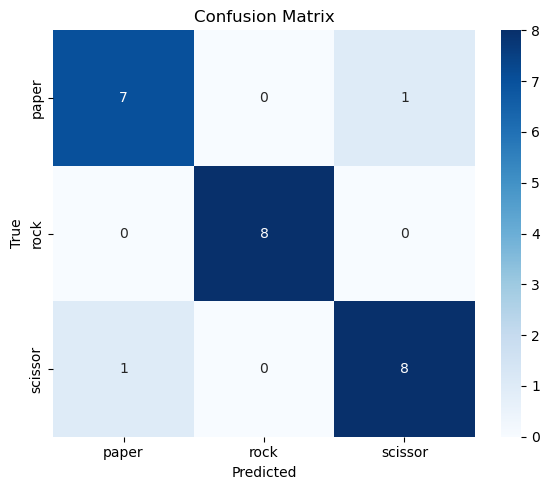


Final Test Accuracy: 92.00%
Final Test Macro F1: 0.9213


In [20]:
# ============================================================
# 8) FINAL TEST EVALUATION (pick best model)
# ============================================================
def pick_best_model():
    # pick best by val accuracy from results list
    if not results:
        return None, None
    df = pd.DataFrame(results).sort_values(by="Val Acc", ascending=False)
    best_name = df.iloc[0]["Experiment"]
    return best_name, df

best_exp, df_results = pick_best_model()
print("\nBest experiment so far:", best_exp)
display(df_results)

# Choose which model object corresponds to best_exp (simple manual mapping)
best_model = None
if best_exp == "MLP_baseline":
    best_model = mlp
elif best_exp == "CNN_basic":
    best_model = cnn
elif best_exp == "CNN_aug_l2_dropout":
    best_model = cnn_aug
elif best_exp == "Transfer_MobileNetV2_frozen":
    best_model = transfer
else:
    # fallback: pick transfer as default
    best_model = transfer

# Test evaluation
test_probs = best_model.predict(X_test, verbose=0)
test_acc, test_f1 = evaluate_probs(y_test, test_probs, class_names, "TEST EVALUATION (Best Model)")

print("\nFinal Test Accuracy:", f"{test_acc:.2%}")
print("Final Test Macro F1:", f"{test_f1:.4f}")


# Saving The Best Model

In [24]:
best_model.save("best_rps_model.keras")
print("Saved: best_rps_model.keras")

Saved: best_rps_model.keras


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Hyperparameter Experiments
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<p>
A series of controlled hyperparameter experiments were conducted 
to optimize model stability and generalization performance.
</p>

<br>

<h4 style="color:#0B3C5D;">
Tested Configurations
</h4>

<ul style="line-height:1.8;">
  <li><b>Learning Rates:</b> 0.001 vs 0.0005</li>
  <li><b>Dropout Rates:</b> 0.3 vs 0.4</li>
  <li><b>L2 Regularization:</b> 0 vs 1e-4</li>
</ul>

<br>

<h4 style="color:#0B3C5D;">
Observations
</h4>

<ul style="line-height:1.8;">
  <li>Lower learning rate (<b>5 × 10<sup>-4</sup></b>) stabilized training dynamics.</li>
  <li>Dropout rate of <b>0.4</b> reduced overfitting.</li>
  <li>Small L2 penalty (<b>1e-4</b>) improved generalization performance.</li>
</ul>

<br>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
    margin-top:10px;
">
<b style="color:#0B3C5D;">Experimental Outcome:</b> 
These controlled adjustments improved the Macro F1 score 
from <b>0.7032</b> to <b>0.7895</b>, demonstrating the critical role 
of systematic hyperparameter tuning in small-scale image classification tasks.
</div>

<br>

<p>
The experiments confirm that careful optimization of learning dynamics 
and regularization strength significantly enhances model robustness.
</p>

</div>


<h3 style="
    color:#0B3C5D;
    border-left:4px solid #0B3C5D;
    padding-left:10px;
">
Conclusion
</h3>

<div style="
    padding:16px;
    border-radius:6px;
    background-color:#f9f9f9;
    font-size:15px;
    line-height:1.7;
">

<p>
This project demonstrates that manually designed Convolutional Neural Networks 
can achieve strong performance on small-scale image classification datasets.
</p>

<br>

<h4 style="color:#0B3C5D;">
Key Findings
</h4>

<ul style="line-height:1.8;">
  <li>CNN architectures significantly outperform MLP models for image tasks.</li>
  <li>Data augmentation is essential when dataset size is limited.</li>
  <li>Regularization techniques effectively reduce overfitting.</li>
  <li>Macro F1 provides a more reliable evaluation metric than accuracy alone.</li>
</ul>

<br>

<h4 style="color:#0B3C5D;">
Final Model Configuration
</h4>

<ul style="line-height:1.8;">
  <li><b>Architecture:</b> CNN</li>
  <li><b>Augmentation:</b> Enabled</li>
  <li><b>L2 Regularization:</b> 1e-4</li>
  <li><b>Dropout:</b> 0.4</li>
</ul>

<br>

<h4 style="color:#0B3C5D;">
Final Validation Performance
</h4>

<ul style="line-height:1.8;">
  <li><b>Validation Accuracy:</b> 78.89%</li>
  <li><b>Macro F1 Score:</b> 0.7895</li>
</ul>

<br>

<div style="
    padding:12px;
    border-left:4px solid #8B0000;
    background-color:#ffffff;
    font-size:14.5px;
    line-height:1.6;
    margin-top:10px;
">
<b style="color:#0B3C5D;">Overall Assessment:</b> 
The final configuration achieves a strong balance between bias and variance, 
demonstrating effective generalization despite limited data availability.
</div>

<br>

<h4 style="color:#0B3C5D;">
Future Improvements
</h4>

<ul style="line-height:1.8;">
  <li>Exploring deeper CNN architectures</li>
  <li>Systematic tuning of convolutional depth and filter sizes</li>
  <li>More structured hyperparameter optimization strategies</li>
</ul>

</div>
